# Trabalho de Modelagem de Sistemas Complexos

## Integrantes

Vinicius Henrique Crispim Rosa - 9295067

Yago Primerano Arouca - 12608643

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [7]:
n = 5  # número de guichês de atendimento
μ = 0.5  # taxa de atendimento do guichê
λ = 3  # taxa de chegada dos clientes
T = 50  # tempo total de funcionamento do sistema (em minutos)
N = 5000  # número de repetições da simulação

In [21]:
def atendimento(n, μ, λ, T):
  Tc = 0  # instante de chegada do último cliente até o momento
  tdisp = np.zeros(n)  # instante em que cada guichê estará disponível
  k = 0  # contador de clientes que entraram na fila até o momento
  tcheg = []  # instante em que cada cliente chegou
  x = 0  # contador de clientes atendidos
  y = 0  # contador de clientes que foram embora
  r = 0  # comprimento atual da fila
  tm = 0  # tempo máximo de permanência
  while True:
    z = np.random.exponential(scale=1/λ)  # intervalo de tempo até a chegada do próximo cliente
    Tc += z  # instante de chegada do próximo cliente
    if Tc > T:
      break
    tcheg.append(Tc)
    k += 1
    
    while np.any(Tc >= tdisp) and x < k:
      j = np.argmin(tdisp)
      tdisp[j] =  max(tdisp[j], tcheg[x]) + np.random.exponential(scale=1/μ)
      tm = max(tm, tdisp[j] - tcheg[x])
      x += 1

    r = max(0, k-1-x)
    s = np.random.binomial(n=1, p=r/(r+n))
    if s == 1:
      y += 1
      k -= 1

    r = k - x
    w = y / (x + y + r)
  return x, y, r, tm

In [22]:
def simular_atendimento_com_fila(n, μ, λ, T, N):
    x_historic = [] # resultados de clientes atendidos
    y_historic = [] # resultados de clientes que foram embora
    w_historic = [] # resultados de proporção de clientes que foram embora
    tm_historic = [] # resultados do tempo máximo de permanência dentre todos os clientes atendidos até o momento
  
    x_total = 0  # contador total de clientes atendidos
    y_total = 0  # contador total de clientes que foram embora
    r_total = 0  # comprimento total da fila
    tm_total = 0  # tempo máximo de permanência
    
    for _ in range(N):
        x, y, r, tm = atendimento(n, μ, λ, T)
        x_historic.append(x)
        y_historic.append(y)
        w_historic.append(y / (x + y + r))
        tm_historic.append(tm)

        x_total += x
        y_total += y
        tm_total += tm

    x_mean = np.mean(x_historic)
    y_mean = np.mean(y_historic)
    w_mean = np.mean(w_historic)
    tm_mean = np.mean(tm_historic)

    x_desvio = np.std(x_historic)
    y_desvio = np.std(y_historic)
    w_desvio = np.std(w_historic)
    tm_desvio = np.std(tm_historic)
    
    # Retornar o número médio de clientes atendidos, número médio de clientes que foram embora,
    # comprimento médio da fila e tempo máximo de permanência
    return x_mean, y_mean, w_mean, tm_mean, x_desvio, y_desvio, w_desvio, tm_desvio, w_historic, tm_historic


# Subproblema 1

### Impressão das médias finais X, Y , W , TM nas N iterações

In [23]:
x_mean, y_mean, w_mean, tm_mean, x_desvio, y_desvio, w_desvio, tm_desvio, w_historic, tm_historic = simular_atendimento_com_fila(n, μ, λ, T, N)
print(f'Número médio de clientes atendidos: {x_mean:.2f} ± {x_desvio:.2f}')
print(f'Número médio de clientes que foram embora: {y_mean:.2f} ± {y_desvio:.2f}')
print(f'Proporção média de clientes que foram embora: {w_mean:.2f} ± {w_desvio:.3f}')

Número médio de clientes atendidos: 203.93 ± 12.25
Número médio de clientes que foram embora: 34.22 ± 15.43
Proporção média de clientes que foram embora: 0.14 ± 0.058


### Valor de w<sub>s</sub> para o qual Pr(w>w<sub>s</sub>)<5%


In [10]:
amplitude = 2 * 1.96 * (w_desvio / np.sqrt(N))
print(f'Intervalo de confiança de 95% para a proporção de clientes que foram embora: {w_mean:.5f} ± {amplitude:.5f}')

Intervalo de confiança de 95% para a proporção de clientes que foram embora: 0.18023 ± 0.00404


## Gráficos

In [13]:
N = 500
interacoes = []
w_desvios = []
w_means = []
tm_means = []
tm_desvios = []

while True:
  x_mean, y_mean, w_mean, tm_mean, x_desvio, y_desvio, w_desvio, tm_desvio, w_historic, tm_historic = simular_atendimento_com_fila(n, μ, λ, T, N)
  amplitude = 2 * 1.96 * (w_desvio / np.sqrt(N))
  interacoes.append(N)
  w_means.append(w_mean)
  w_desvios.append(w_desvio)
  tm_means.append(tm_mean)
  tm_desvios.append(tm_desvio)
  if amplitude < 0.002:
    break
  N += 500

N = 500
amplitude = 0.01329
N = 1000
amplitude = 0.00934
N = 1500
amplitude = 0.00698
N = 2000
amplitude = 0.00633
N = 2500
amplitude = 0.00557
N = 3000
amplitude = 0.00519
N = 3500
amplitude = 0.00479
N = 4000
amplitude = 0.00450
N = 4500
amplitude = 0.00426
N = 5000
amplitude = 0.00402
N = 5500
amplitude = 0.00385
N = 6000
amplitude = 0.00367
N = 6500
amplitude = 0.00360
N = 7000
amplitude = 0.00338
N = 7500
amplitude = 0.00329
N = 8000
amplitude = 0.00315
N = 8500
amplitude = 0.00310
N = 9000
amplitude = 0.00303
N = 9500
amplitude = 0.00291
N = 10000
amplitude = 0.00287
N = 10500
amplitude = 0.00278
N = 11000
amplitude = 0.00274
N = 11500
amplitude = 0.00265
N = 12000
amplitude = 0.00260
N = 12500
amplitude = 0.00255
N = 13000
amplitude = 0.00250
N = 13500
amplitude = 0.00245
N = 14000
amplitude = 0.00240
N = 14500
amplitude = 0.00239
N = 15000
amplitude = 0.00232
N = 15500
amplitude = 0.00228
N = 16000
amplitude = 0.00224
N = 16500
amplitude = 0.00221
N = 17000
amplitude = 0.00220


### Gráficos de linha para W e TM

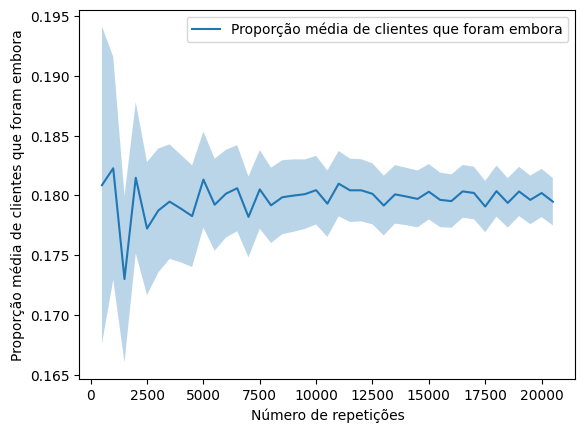

In [14]:
intervalo_superior = [w_means[i] + 2 * 1.96 * (w_desvios[i] / np.sqrt(interacoes[i])) for i in range(len(interacoes))]
intervalo_inferior = [w_means[i] - 2 * 1.96 * (w_desvios[i] / np.sqrt(interacoes[i])) for i in range(len(interacoes))]
plt.plot(interacoes, w_means, label='Proporção média de clientes que foram embora')
plt.fill_between(interacoes, intervalo_inferior, intervalo_superior, alpha=0.3)
plt.xlabel('Número de repetições')
plt.ylabel('Proporção média de clientes que foram embora')
plt.legend()
plt.show()

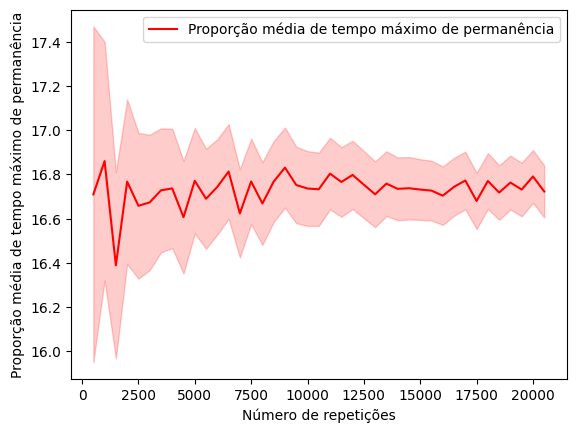

In [15]:
intervalo_superior = [tm_means[i] + 2 * 1.96 * (tm_desvios[i] / np.sqrt(interacoes[i])) for i in range(len(interacoes))]
intervalo_inferior = [tm_means[i] - 2 * 1.96 * (tm_desvios[i] / np.sqrt(interacoes[i])) for i in range(len(interacoes))]
plt.plot(interacoes, tm_means, label='Proporção média de tempo máximo de permanência', color='red')
plt.fill_between(interacoes, intervalo_inferior, intervalo_superior, alpha=0.2, color='red')
plt.xlabel('Número de repetições')
plt.ylabel('Proporção média de tempo máximo de permanência')
plt.legend()
plt.show()

### Histogramas de W e de tm obtidos nas N iterações

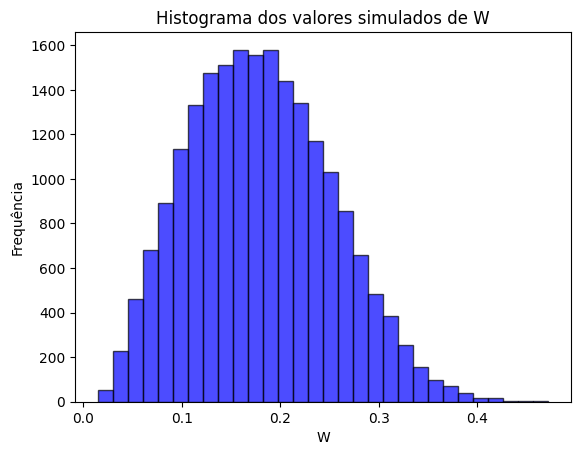

In [16]:
plt.hist(w_historic, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('W')
plt.ylabel('Frequência')
plt.title('Histograma dos valores simulados de W')
plt.show()

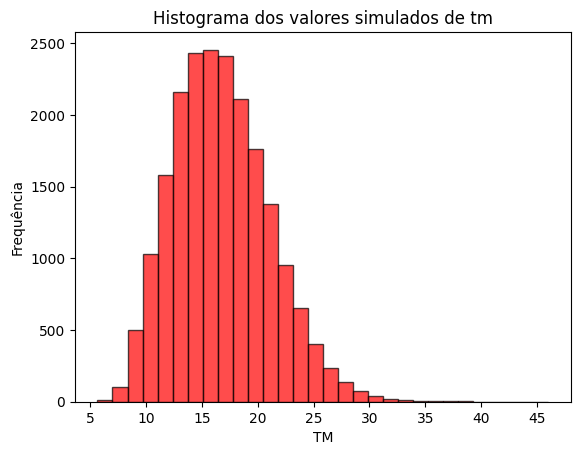

In [17]:
plt.hist(tm_historic, bins=30, color='red', edgecolor='black', alpha=0.7)
plt.xlabel('TM')
plt.ylabel('Frequência')
plt.title('Histograma dos valores simulados de tm')
plt.show()

### Pr(tm > 13)

In [18]:
mean = tm_means[-1]
std = tm_desvios[-1]

x = 13

z = (x - mean) / std

p = 1 - norm.cdf(z)

print(f'Probabilidade de um cliente esperar mais de 13 minutos: {p*10:.2f}%')


Probabilidade de um cliente esperar mais de 13 minutos: 0.80669


# Subproblema 2

Para determinar o numero de guiches n necessários para w seja menor que 0.2, com intervalo de confiança de 95%, seguimos o seguinte passo a passo:

- enquanto w for maior que 0.2 ou o intervalo de confiança for menor que 95% repita
  - se w < 0.2, aumente w em 1 unidade
  - se intervalo de confiança < 95%, aumente o numero de iterações em 1000 unidades
  - rode a simulação
- Imprima os valores de guiches e de iterações

In [19]:
n = 1  # número de guichês de atendimento
μ = 0.5  # taxa de atendimento do guichê
λ = 4  # taxa de chegada dos clientes
T = 60  # tempo total de funcionamento do sistema (em minutos)
N = 16000  # número de repetições da simulação

In [20]:
w = 1
amplitude = 1
N=10000
n=0
while(w > 0.2 or amplitude > 0.002):
  if (w > 0.2):
    n += 1
  if(amplitude > 0.002):
    N += 1000
  x_mean, y_mean, w, tm_mean, x_desvio, y_desvio, w_desvio, tm_desvio, w_historic, tm_historic = simular_atendimento_com_fila(n, μ, λ, T, N)
  amplitude = 2 * 1.96 * (w_desvio / np.sqrt(N))

print(f'Número de guichês de atendimento necessários: {n}')
print(f'Número de repetições necessárias: {N}')

Número de guichês de atendimento necessários: 7
Número de repetições necessárias: 14000
